In [173]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
def make_filter(r):
    Y, X = np.mgrid[:2*r+1, :2*r+1]
    dist = (Y - r)**2 + (X - r)**2
    mask = dist <= r**2
    mask = mask/np.sum(mask)

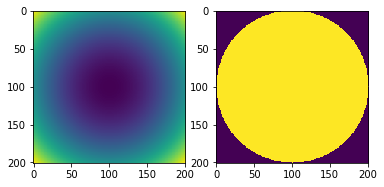

In [3]:
make_filter(100)

In [169]:
def equidistant_points(x, y, d):
    h, w = 10, 10
    img = np.zeros((h,w))
    img[x, y] = 1
    points = set()
    for i in range(d+1):
        j = np.round((d**2-i**2)**(0.5))
        points.add((j, i))
        points.add((i, j))
    points = np.array(list(points)).astype(np.int)
    p1 = points + [x, y]
    p2 = points * [-1, 1] + [x, y]
    p3 = points * [1, -1] + [x, y]
    p4 = points * [-1, -1] + [x, y]
    points = np.concatenate([p1,p2,p3,p4])
    final_points = []
    for p in points:
        if p[0] >= 0 and p[0] < 100:
            if p[1] >= 0 and p[1] < 80:
                img[p[0], p[1]] = 1
                final_points.append(list(p))
    plt.imshow(img)
    plt.show()
    return final_points

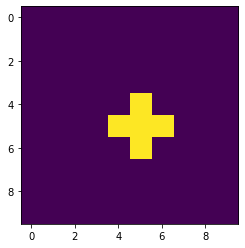

[[5, 6], [6, 5], [5, 6], [4, 5], [5, 4], [6, 5], [5, 4], [4, 5]]

In [170]:
equidistant_points(5, 5, 1)

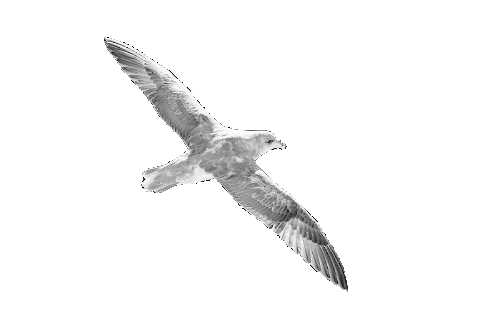

In [203]:
img = Image.open('./1/screenshot.png').convert('L')
img

In [204]:
img = np.array(img)
img = img / 255

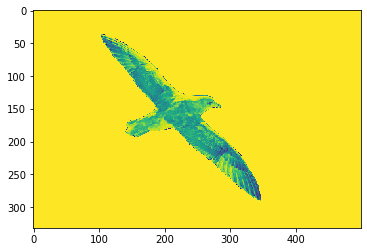

In [205]:
plt.imshow(img)

In [206]:
img = 1 - img


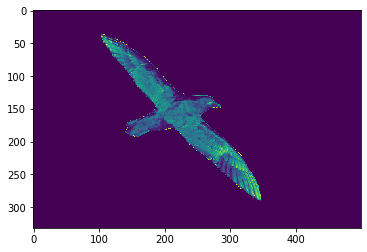

In [207]:
plt.imshow(img)

In [208]:
img = img > 0

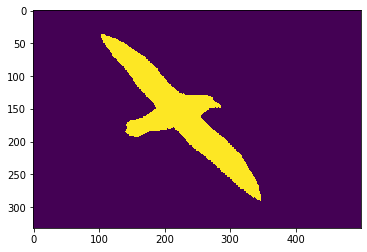

In [209]:
plt.imshow(img)

In [210]:
a = Image.fromarray(img)

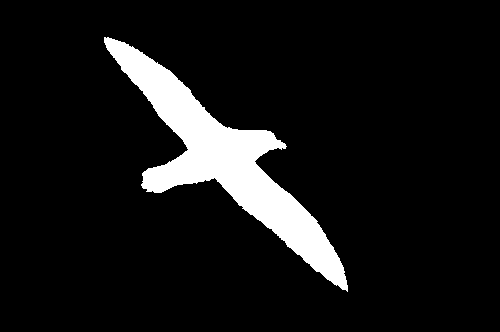

In [211]:
a

In [212]:
a.resize((1100,732)).save('./1/images/mask2.png')